### Creating a Machine Learning model to determine the quality of the wine

#### Importing libraries

In [319]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#### Reading the dataset

In [320]:
df = pd.read_csv('winequality-white.csv', sep=';')

In [321]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [322]:
df['color'] = 'white'

In [323]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white


#### Description of the dataset

In [324]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


#### Retrieving information about the dataset

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  color                 4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


#### Unique colors in the dataset

In [326]:
df['color'].unique()

array(['white'], dtype=object)

In [327]:
df.count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
color                   4898
dtype: int64

In [328]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

#### Checking if there is any missing value in the dataset

In [329]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

*We can see that there no missing values in the dataset*

#### Defining function to create boxplots and distplots

In [330]:
from scipy.stats import skew

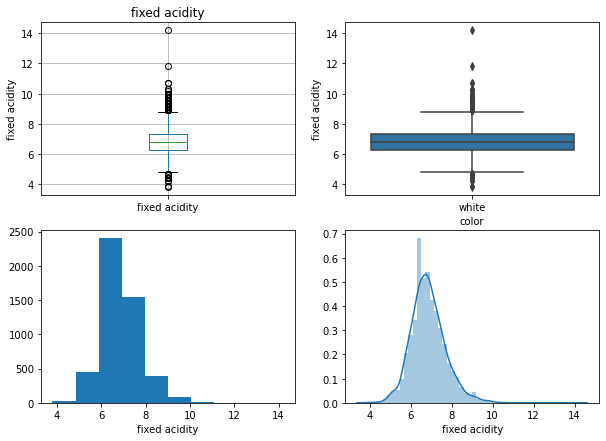

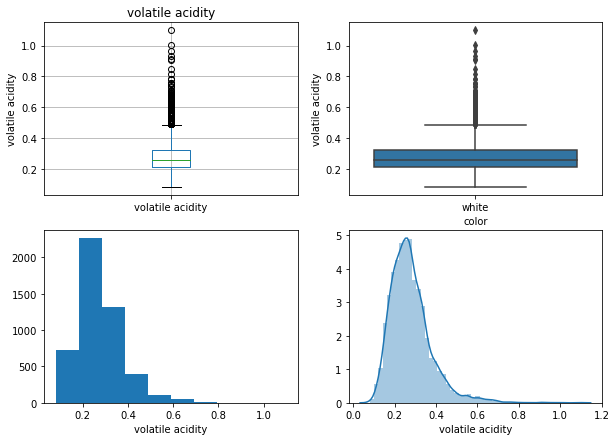

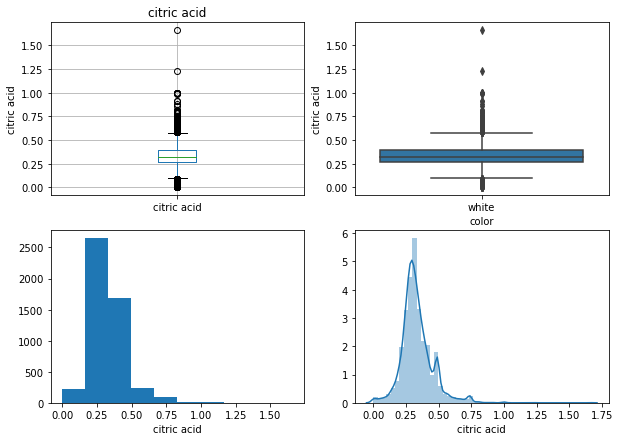

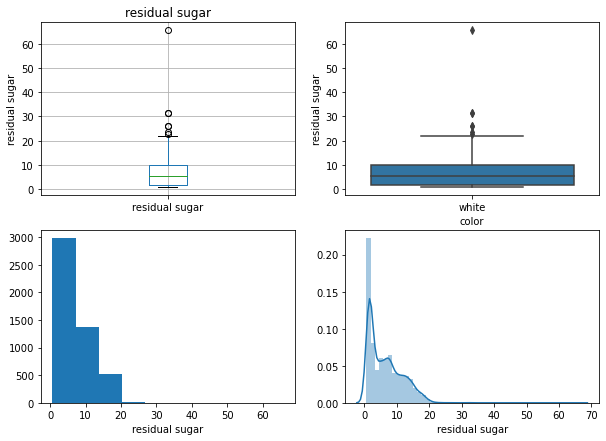

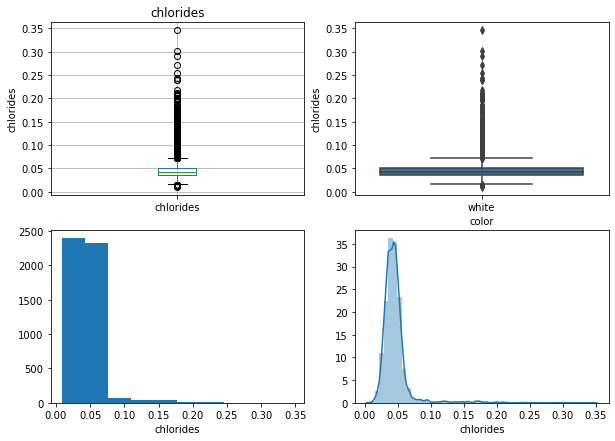

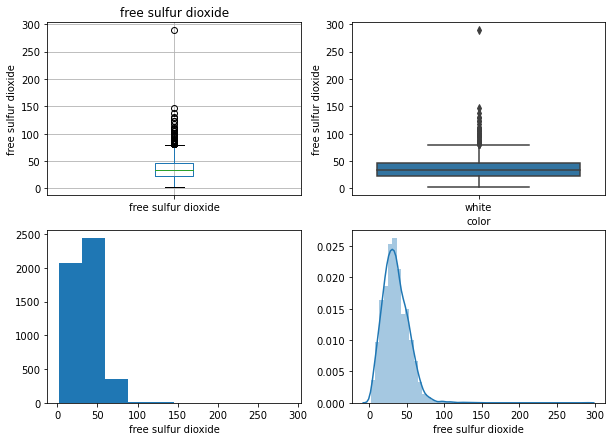

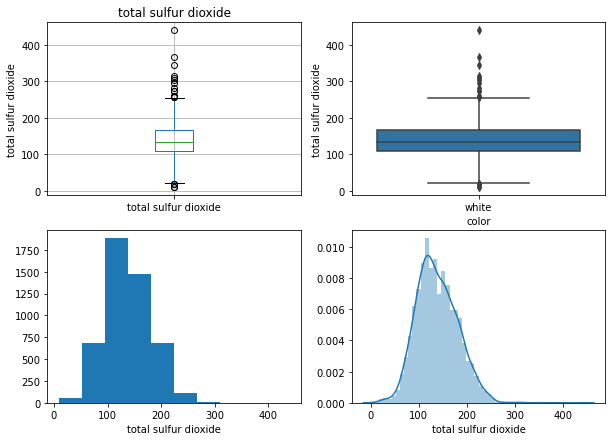

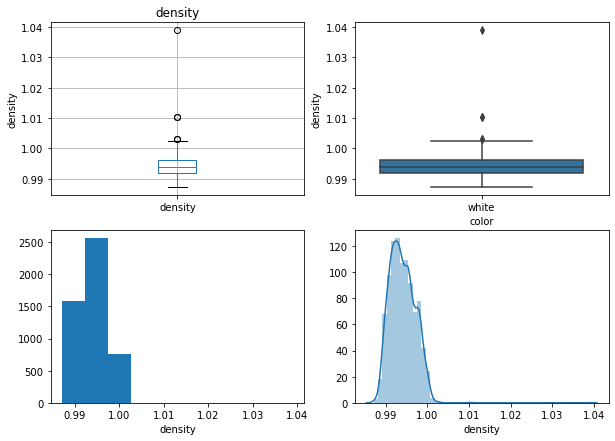

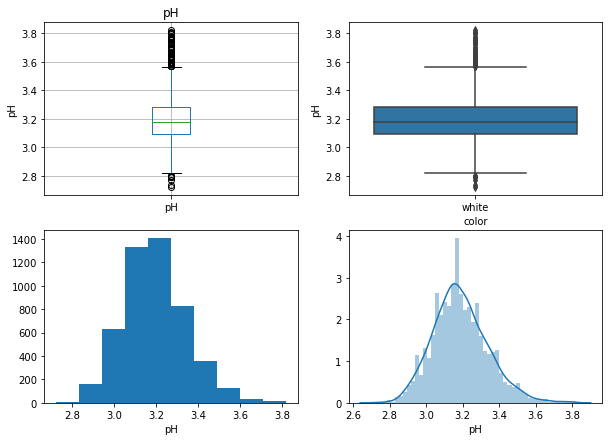

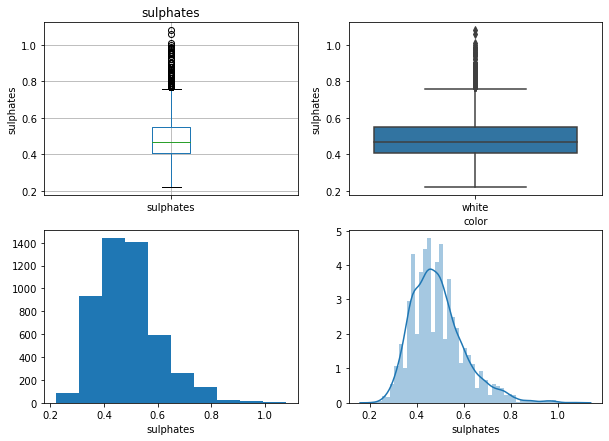

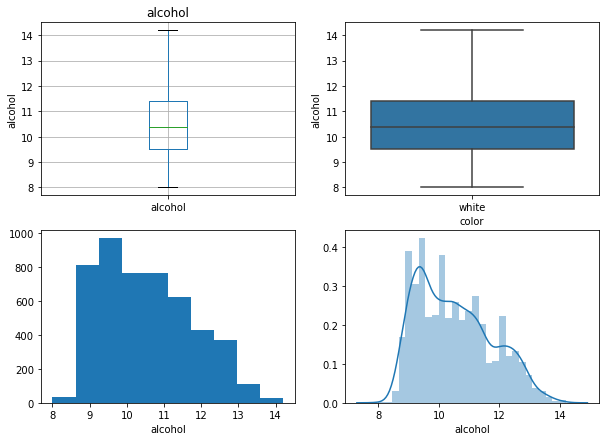

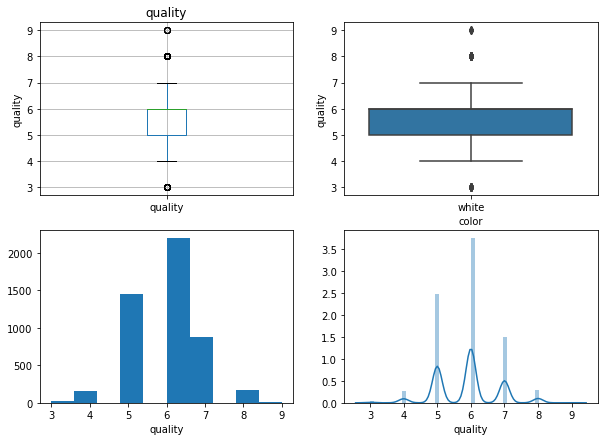

In [331]:

def create_boxplots_distplots(dataset):
    features = [feature for feature in dataset.columns if feature != 'color']
    for feature in features:
        plt.figure(figsize=(10,7))
        plt.subplot(2,2,1)
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.boxplot(x=dataset['color'], y=dataset[feature])
        plt.subplot(2,2,3)
        plt.hist(dataset[feature])
        plt.xlabel(feature)
        plt.subplot(2,2,4)
        sns.distplot(dataset[feature].dropna())
        plt.show()
    
create_boxplots_distplots(df)


We can see from the boxplots that there are outliers. So we need to to handle these outliers.

#### Defining function to handle outliers

*Using 3xIQR for features having extreme oultiers and high skewness*

In [332]:
def remove_extreme_outliers(dataset, list_of_features):
    for feature in list_of_features:
        if feature != 'color':
            IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
            lower_bridge = dataset[feature].quantile(0.25) - IQR*(3)
            upper_bridge = dataset[feature].quantile(0.75) + IQR*(3)
            #print(lower_bridge, upper_bridge)
            dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
            if lower_bridge >=0:    
                dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge


            
features = ['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol']
remove_extreme_outliers(df, features)

*Using 1.5xIQR for features having not so extreme oultiers and low skewness*

In [333]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        if feature != 'color':
            IQR = dataset[feature].quantile(0.75)-df[feature].quantile(0.25)
            lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
            upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
            #print(lower_bridge, upper_bridge)
            dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
            if lower_bridge >=0:
                dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge


features = ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 'pH']    
remove_outliers(df, features)

In [334]:
#create_boxplots_distplots(df)

In [335]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white


#### Plotting a count of number of samples for respective qualities

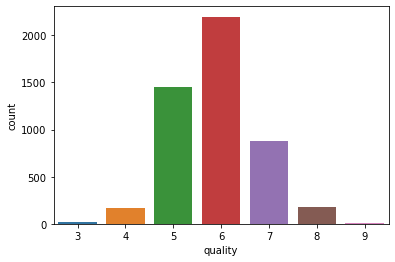

In [336]:
sns.countplot('quality', data=df)

In [337]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

#### Pie chart showing distribution of qualities

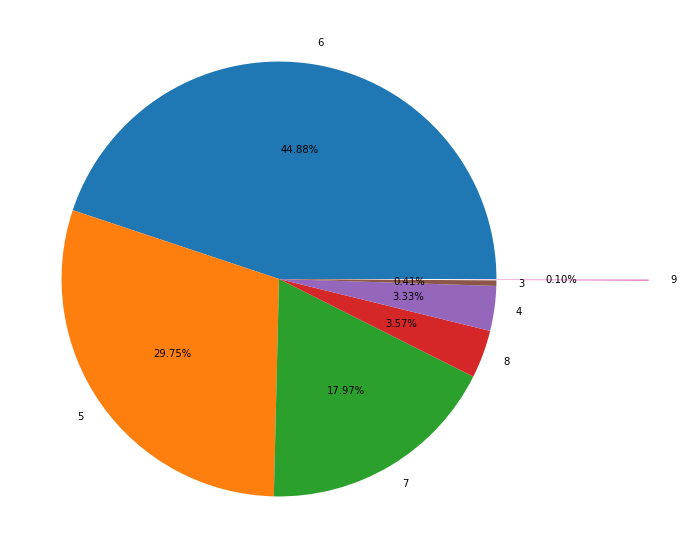

In [338]:
plt.figure(figsize=(15,10))
plt.pie(df['quality'].value_counts(), labels=df['quality'].unique(), autopct='%0.2f%%', explode=(0,0,0,0,0,0,0.7))
plt.show()

#### Determining correlation between the features of the dataset

In [339]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.034171,0.294855,0.098373,0.056484,-0.042476,0.095110,0.274292,-0.426930,-0.018290,-0.121810,-0.105773
volatile acidity,-0.034171,1.000000,-0.147690,0.064015,0.042665,-0.093074,0.101100,0.007237,-0.040234,-0.042389,0.075278,-0.182478
citric acid,0.294855,-0.147690,1.000000,0.093928,0.088917,0.099789,0.123589,0.153358,-0.168001,0.066417,-0.081920,-0.008669
residual sugar,0.098373,0.064015,0.093928,1.000000,0.176089,0.314894,0.410442,0.834862,-0.198403,-0.028972,-0.456840,-0.098831
chlorides,0.056484,0.042665,0.088917,0.176089,1.000000,0.129008,0.292897,0.398324,-0.075450,0.039551,-0.494964,-0.276501
free sulfur dioxide,-0.042476,-0.093074,0.099789,0.314894,0.129008,1.000000,0.612501,0.312931,-0.005424,0.058639,-0.256832,0.018301
total sulfur dioxide,0.095110,0.101100,0.123589,0.410442,0.292897,0.612501,1.000000,0.545640,0.000625,0.133807,-0.454231,-0.170402
density,0.274292,0.007237,0.153358,0.834862,0.398324,0.312931,0.545640,1.000000,-0.101411,0.073220,-0.799010,-0.314154
pH,-0.426930,-0.040234,-0.168001,-0.198403,-0.075450,-0.005424,0.000625,-0.101411,1.000000,0.153866,0.123953,0.102629
sulphates,-0.018290,-0.042389,0.066417,-0.028972,0.039551,0.058639,0.133807,0.073220,0.153866,1.000000,-0.018062,0.053460


#### Determining correlation between the features of the dataset using a heatmap

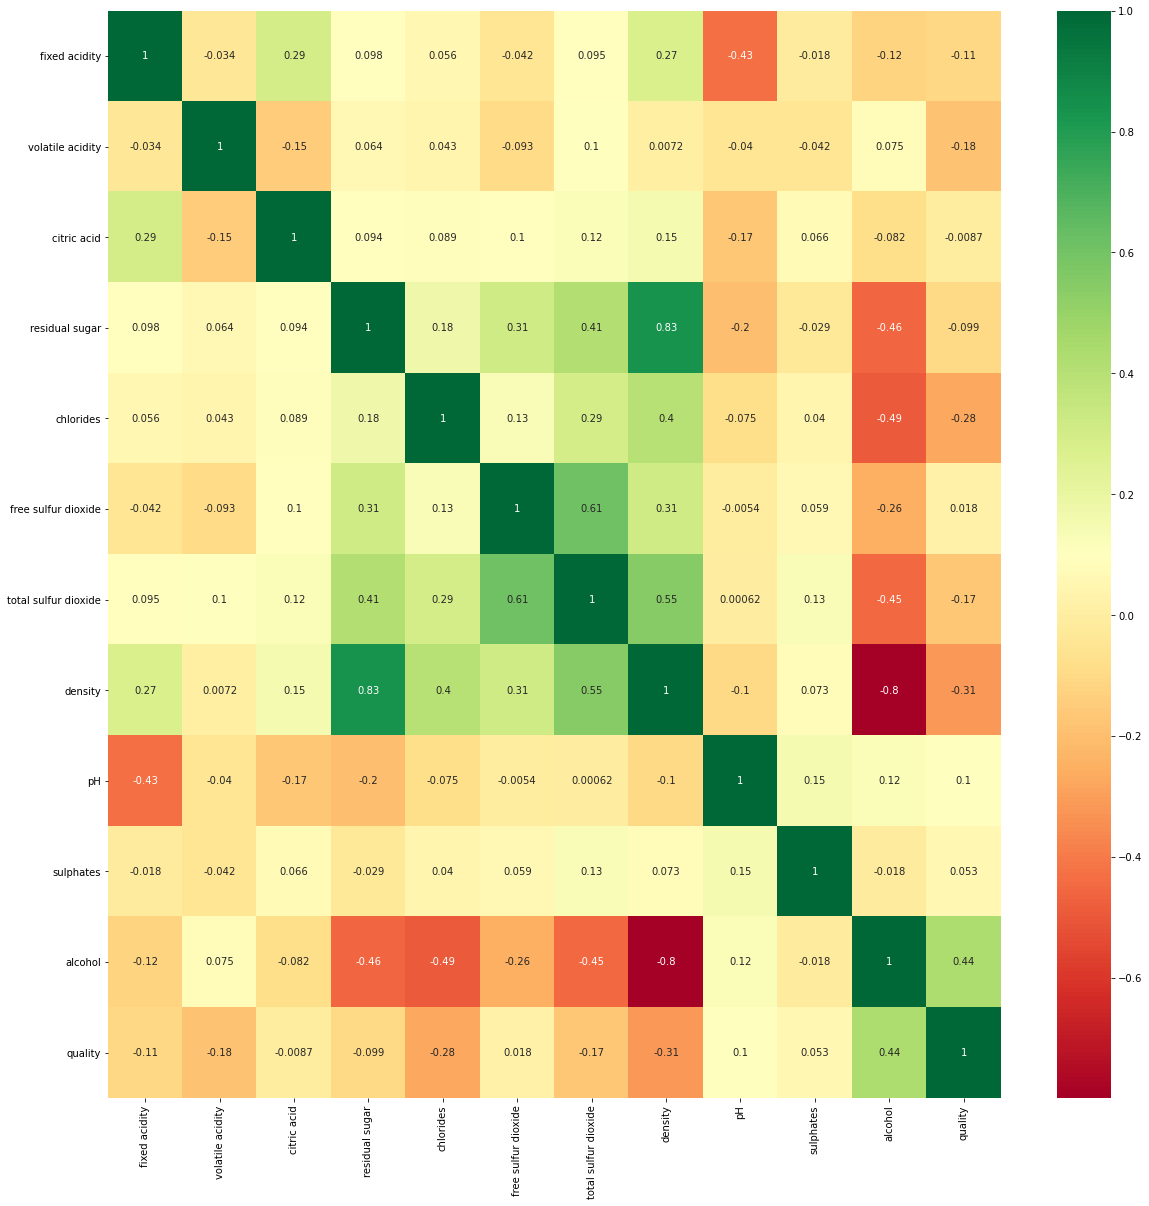

In [340]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

** In the above heatmap, if there are any 2 independent features that are highly correlated i.e. 80% or more, then we can drop 1 of those 2 features because both those features are serving the same purpose. We can see that density and 'residual sugar' features have a pearson correlation coefficient of 0.83 i.e. 83% and thus we can drop 1 of these 2 features. But in the dataset of red wines, these 2 features are not strongly correlated and thus we cannot drop 1 amongst these 2features from the red wine dataset. So we will retain these features in the white wine dataset as well**

In [341]:
#df = df.drop(columns=['residual sugar'])

In [342]:
#df.head()

#### Determining the data types for each column of the dataset

In [343]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [344]:
#b = sns.PairGrid(df)
#b.map(plt.scatter)

In [345]:
#df.head(20)

In [346]:
df.shape

(4898, 13)

#### Identifying and removing duplicate rows in the dataset

In [347]:
df.duplicated(['fixed acidity'])

0       False
1       False
2       False
3       False
4        True
        ...  
4893     True
4894     True
4895     True
4896     True
4897     True
Length: 4898, dtype: bool

In [348]:
df[df.duplicated(['fixed acidity', 'volatile acidity', 'citric acid', 
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
      'pH', 'sulphates', 'alcohol'])==True]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6,white
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6,white
7,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6,white
8,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6,white
20,6.2,0.485,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.230,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5,white
4850,7.0,0.360,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6,white
4851,6.4,0.330,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5,white
4856,7.1,0.230,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,white


In [349]:
df = df[df.duplicated(['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])==False]


In [350]:
df.count()

fixed acidity           3956
volatile acidity        3956
citric acid             3956
residual sugar          3956
chlorides               3956
free sulfur dioxide     3956
total sulfur dioxide    3956
density                 3956
pH                      3956
sulphates               3956
alcohol                 3956
quality                 3956
color                   3956
dtype: int64

In [351]:
df.shape

(3956, 13)

#### Determining the count of unique values in each column of the dataset

In [352]:
df.nunique()

fixed acidity            44
volatile acidity         80
citric acid              76
residual sugar          309
chlorides                82
free sulfur dioxide     125
total sulfur dioxide    237
density                 889
pH                       77
sulphates                74
alcohol                 103
quality                   7
color                     1
dtype: int64

#### Plotting a scatterplot matrix of the independent features

In [353]:
#pd.plotting.scatter_matrix(df, alpha=0.1, figsize=(20,20), diagonal='hist', grid=True, )

In [354]:
'''
def create_relplot(dataset):
    features = [feature for feature in dataset.columns if feature != 'color']
    for feature in features:
        for bivariate_feature in features:
            if bivariate_feature != feature:
                plt.figure(figsize=(10,10))
                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue='quality')
                plt.show()


create_relplot(df)
'''

"\ndef create_relplot(dataset):\n    features = [feature for feature in dataset.columns if feature != 'color']\n    for feature in features:\n        for bivariate_feature in features:\n            if bivariate_feature != feature:\n                plt.figure(figsize=(10,10))\n                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue='quality')\n                plt.show()\n\n\ncreate_relplot(df)\n"

In [355]:
#sns.pairplot(df, hue='quality')

#### Removing multivariate outliers

In [356]:
df.shape

(3956, 13)

In [357]:
df[(df['free sulfur dioxide'] > 100) & (df['fixed acidity'] > 8.5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
3307,8.8,0.24,0.29,8.5,0.037,115.0,208.0,0.99395,2.9,0.38,11.0,3,white


In [358]:
df = df.drop(df[(df['free sulfur dioxide'] > 100) & (df['fixed acidity'] > 8.5)].index)

In [359]:
df[(df['free sulfur dioxide'] > 100) & (df['fixed acidity'] > 8.5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [360]:
df.shape

(3955, 13)

In [361]:
df[(df['chlorides'] > 0.08) & (df['fixed acidity'] > 8.5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
2162,8.8,0.485,0.23,2.4,0.087,19.0,115.0,0.99480,2.805,0.44,9.4,6,white
3220,8.8,0.380,0.53,2.1,0.092,19.0,76.0,0.99001,2.930,0.57,12.9,5,white
3388,8.8,0.390,0.35,1.8,0.092,22.0,80.0,0.99016,2.950,0.54,12.6,6,white


In [362]:
df = df.drop(df[(df['chlorides'] > 0.08) & (df['fixed acidity'] > 8.5)].index)

In [363]:
df[(df['chlorides'] > 0.08) & (df['fixed acidity'] > 8.5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [364]:
df.shape

(3952, 13)

In [365]:
df[(df['density'] > 1.005)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1653,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.009232,3.15,0.38,8.8,6,white
2781,7.8,0.485,0.60,34.5,0.074,8.0,160.0,1.009232,3.39,0.69,11.7,6,white


In [366]:
df = df.drop(df[(df['density'] > 1.005)].index)

In [367]:
df[(df['density'] > 1.005)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [368]:
df.shape

(3950, 13)

In [369]:
df[(df['free sulfur dioxide'] > 100) & (df['volatile acidity'] > 0.45)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1931,7.1,0.485,0.22,2.0,0.047,115.0,255.5,0.9924,3.24,0.37,11.0,3,white


In [370]:
df = df.drop(df[(df['free sulfur dioxide'] > 100) & (df['volatile acidity'] > 0.45)].index)

In [371]:
df[(df['free sulfur dioxide'] > 100) & (df['volatile acidity'] > 0.45)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [372]:
df.shape

(3949, 13)

In [373]:
df[(df['free sulfur dioxide'] > 100) & (df['total sulfur dioxide'] > 225)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
325,7.5,0.270,0.31,5.8,0.057,115.0,255.5,0.99460,3.18,0.59,10.5,5,white
659,6.8,0.290,0.16,1.4,0.038,115.0,234.5,0.99220,3.15,0.47,10.0,4,white
3050,6.2,0.255,0.24,1.7,0.039,115.0,255.5,0.99452,3.53,0.53,9.6,4,white
4745,6.1,0.260,0.25,2.9,0.047,115.0,255.5,0.99314,3.44,0.64,10.5,3,white


In [374]:
df = df.drop(df[(df['free sulfur dioxide'] > 100) & (df['total sulfur dioxide'] > 225)].index)

In [375]:
df[(df['free sulfur dioxide'] > 100) & (df['total sulfur dioxide'] > 225)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [376]:
df.shape

(3945, 13)

In [377]:
df[(df['free sulfur dioxide'] > 100) & (df['pH'] > 3.4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1688,6.7,0.25,0.26,1.55,0.041,115.0,216.0,0.99490,3.55,0.63,9.4,3,white
2334,7.5,0.23,0.35,17.80,0.058,115.0,212.0,1.00241,3.44,0.43,8.9,5,white


In [378]:
df = df.drop(df[(df['free sulfur dioxide'] > 100) & (df['pH'] > 3.4)].index)

In [379]:
df[(df['free sulfur dioxide'] > 100) & (df['pH'] > 3.4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [380]:
df.shape

(3943, 13)

In [381]:
df[(df['alcohol'] > 13) & (df['total sulfur dioxide'] > 250)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
3152,7.6,0.25,0.75,4.6,0.035,51.0,255.5,0.99018,3.03,0.43,13.1,6,white


In [382]:
df = df.drop(df[(df['alcohol'] > 13) & (df['total sulfur dioxide'] > 250)].index)

In [383]:
df[(df['alcohol'] > 13) & (df['total sulfur dioxide'] > 250)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [384]:
df.shape

(3942, 13)

In [385]:
#sns.pairplot(df, hue='quality')

#### Checking for skewness

In [386]:
#create_boxplots_distplots(df)

**Skewness scores to determine skewness in the column**

In [387]:
#for feature in df:
#    print(feature + ": \t")
#    print(skew(df[feature]))
#    print("\n")

From the distplots and skewness scores, it can be observed that the feature columns **free sulfur dioxide**, **sulphates**, **chlorides**, **citric acid** and **alcohol** are considerably positively skewed. From the heatmap, it can be seen that  **free sulfur dioxide**, **sulphates**, **chlorides** and **citric acid** have weak correlation with **quality** whereas **alcohol** has moderate correlation with **quality**. So we will remove skewness from **free sulfur dioxide**, **sulphates**, **chlorides** and **citric acid** by performing square root transformation

In [388]:
#df['free sulfur dioxide'] = np.sqrt(df['free sulfur dioxide'])
#print(skew(df['free sulfur dioxide']))
#sns.distplot(df['free sulfur dioxide'].dropna())

## Reading the dataset of red wines

In [389]:
df1 = pd.read_csv('winequality-red.csv', sep=';')

In [390]:
df1.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [391]:
df1['color'] = 'red'

In [392]:
df1.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [393]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [394]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  color                 1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [395]:
df1['color'].unique()

array(['red'], dtype=object)

In [396]:
df1.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
color                   1599
dtype: int64

In [397]:
df1['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [398]:
df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [399]:
#create_boxplots_distplots(df1)

In [400]:
features = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality']    
remove_extreme_outliers(df1, features)

In [401]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'density']
remove_outliers(df1, features)

In [402]:
#create_boxplots_distplots(df1)

In [403]:
df1.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0,red
9,7.5,0.50,0.36,4.7,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5.0,red


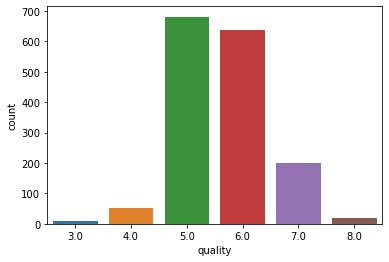

In [404]:
sns.countplot('quality', data=df1)

In [405]:
df1['quality'].value_counts()

5.0    681
6.0    638
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

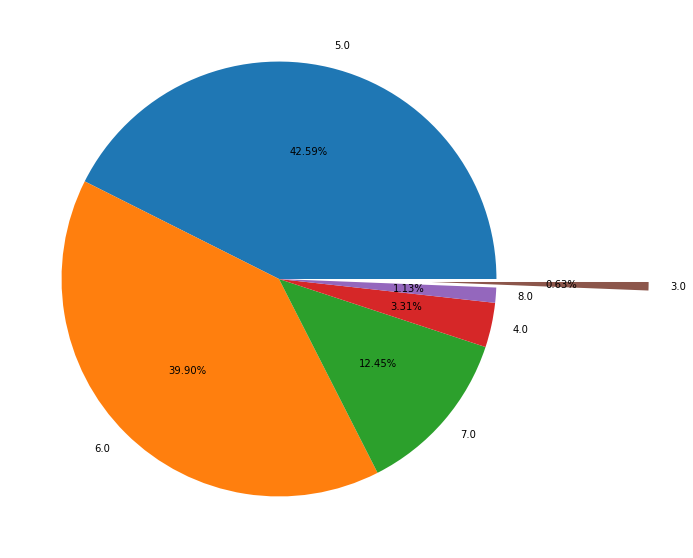

In [406]:
plt.figure(figsize=(15,10))
plt.pie(df1['quality'].value_counts(), labels=df1['quality'].unique(), autopct='%0.2f%%', explode=(0,0,0,0,0,0.7))
plt.show()

In [407]:
df1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.261257,0.677219,0.182300,0.195265,-0.153748,-0.114929,0.667511,-0.684429,0.198394,-0.066831,0.125515
volatile acidity,-0.261257,1.000000,-0.561336,0.037496,0.124815,-0.009245,0.085322,0.023323,0.234717,-0.285314,-0.204239,-0.389516
citric acid,0.677219,-0.561336,1.000000,0.166478,0.152725,-0.062662,0.027336,0.361827,-0.538997,0.325358,0.109192,0.227796
residual sugar,0.182300,0.037496,0.166478,1.000000,0.147641,0.111276,0.161621,0.402316,-0.092904,0.020394,0.107350,0.021549
chlorides,0.195265,0.124815,0.152725,0.147641,1.000000,0.002307,0.079907,0.366843,-0.264901,0.202376,-0.284480,-0.177771
free sulfur dioxide,-0.153748,-0.009245,-0.062662,0.111276,0.002307,1.000000,0.675176,-0.023173,0.070344,0.047133,-0.069338,-0.050608
total sulfur dioxide,-0.114929,0.085322,0.027336,0.161621,0.079907,0.675176,1.000000,0.080388,-0.060380,0.020938,-0.217266,-0.195961
density,0.667511,0.023323,0.361827,0.402316,0.366843,-0.023173,0.080388,1.000000,-0.341471,0.156495,-0.496180,-0.174919
pH,-0.684429,0.234717,-0.538997,-0.092904,-0.264901,0.070344,-0.060380,-0.341471,1.000000,-0.172616,0.205293,-0.057960
sulphates,0.198394,-0.285314,0.325358,0.020394,0.202376,0.047133,0.020938,0.156495,-0.172616,1.000000,0.116494,0.284302


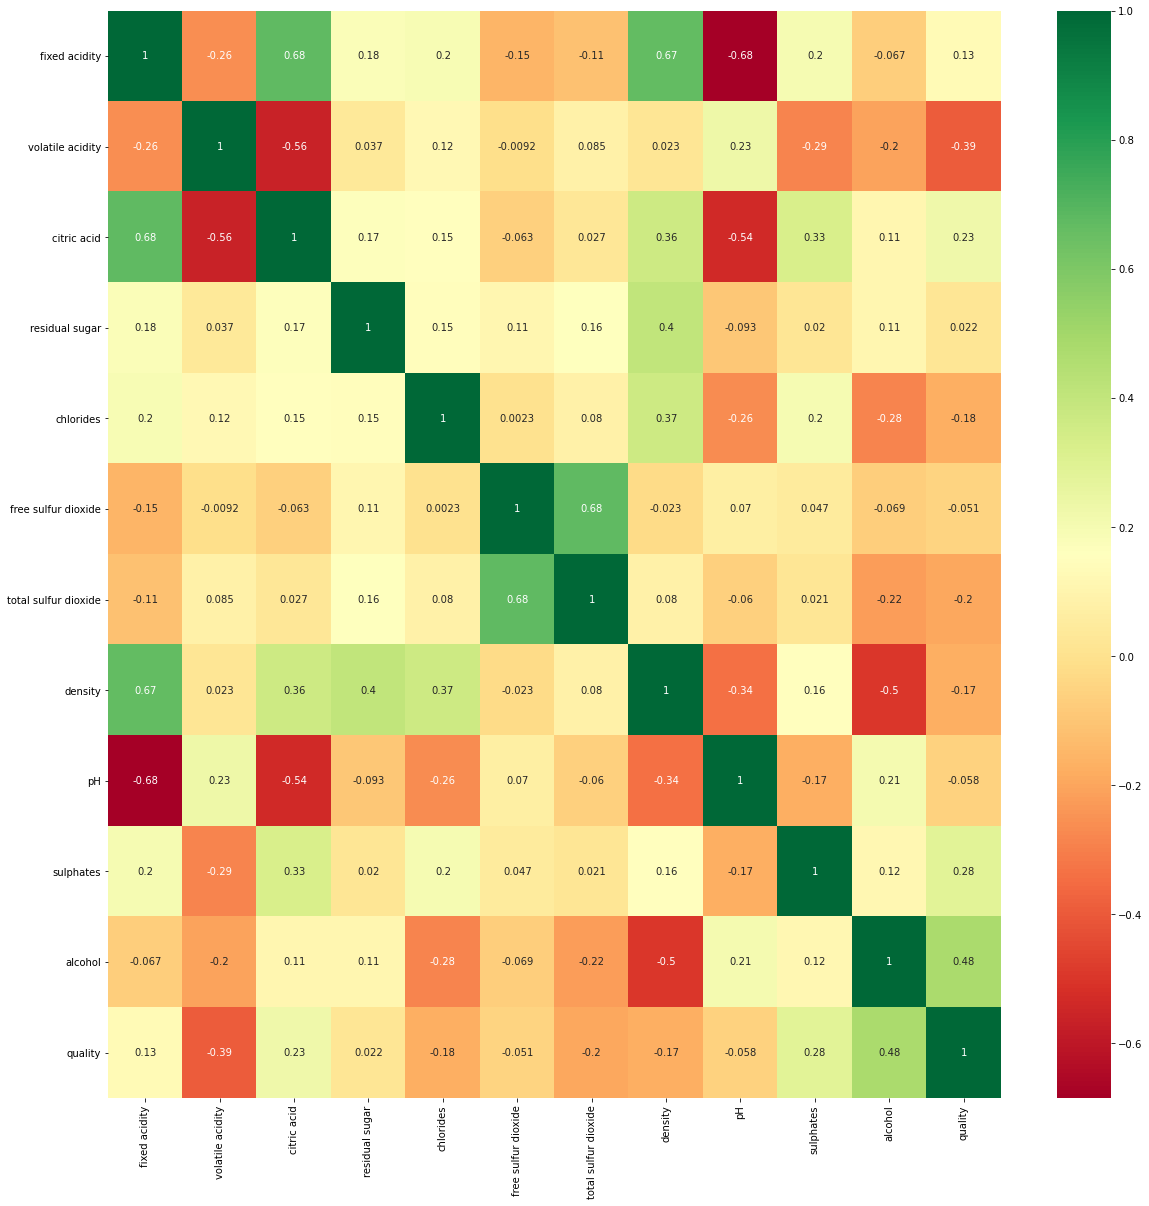

In [408]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(), annot=True, cmap="RdYlGn")

In [409]:
df1.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
color                    object
dtype: object

In [410]:
#b = sns.PairGrid(df1)
#b.map(plt.scatter)

In [411]:
df1.duplicated(['fixed acidity'])

0       False
1       False
2        True
3       False
4        True
        ...  
1594     True
1595     True
1596     True
1597     True
1598     True
Length: 1599, dtype: bool

In [412]:
df1[df1.duplicated(['fixed acidity', 'volatile acidity', 'citric acid', 
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
      'pH', 'sulphates', 'alcohol'])==True]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,red
11,7.5,0.500,0.36,4.70,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5.0,red
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5.0,red
40,7.3,0.450,0.36,4.70,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5.0,red
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5.0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0,red
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0,red
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0,red
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5.0,red


In [413]:
df1 = df1[df1.duplicated(['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])==False]

In [414]:
df1.count()

fixed acidity           1357
volatile acidity        1357
citric acid             1357
residual sugar          1357
chlorides               1357
free sulfur dioxide     1357
total sulfur dioxide    1357
density                 1357
pH                      1357
sulphates               1357
alcohol                 1357
quality                 1357
color                   1357
dtype: int64

In [415]:
df1.shape

(1357, 13)

In [416]:
df1.nunique()

fixed acidity            89
volatile acidity        142
citric acid              66
residual sugar           53
chlorides               101
free sulfur dioxide      58
total sulfur dioxide    143
density                 436
pH                       89
sulphates                85
alcohol                  65
quality                   6
color                     1
dtype: int64

In [417]:
#pd.plotting.scatter_matrix(df1, alpha=0.1, figsize=(20,20), diagonal='hist', grid=True, )

In [418]:
'''
def create_relplot(dataset):
    features = [feature for feature in dataset.columns if feature != 'color']
    for feature in features:
        for bivariate_feature in features:
            if bivariate_feature != feature:
                plt.figure(figsize=(10,10))
                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue='quality')
                plt.show()


create_relplot(df1)
'''

"\ndef create_relplot(dataset):\n    features = [feature for feature in dataset.columns if feature != 'color']\n    for feature in features:\n        for bivariate_feature in features:\n            if bivariate_feature != feature:\n                plt.figure(figsize=(10,10))\n                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue='quality')\n                plt.show()\n\n\ncreate_relplot(df1)\n"

In [419]:
#sns.pairplot(df1, hue='quality')

In [420]:
df1.shape

(1357, 13)

In [421]:
df1[(df1['free sulfur dioxide'] > 50) & (df1['fixed acidity'] > 11)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
584,11.8,0.33,0.49,3.4,0.093,54.0,80.0,1.0002,3.3,0.76,10.7,7.0,red


In [422]:
df1 = df1.drop(df1[(df1['free sulfur dioxide'] > 50) & (df1['fixed acidity'] > 11)].index)

In [423]:
df1[(df1['free sulfur dioxide'] > 50) & (df1['fixed acidity'] > 11)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [424]:
df1.shape

(1356, 13)

In [425]:
df1[(df1['total sulfur dioxide'] > 175)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1079,7.9,0.3,0.645,4.7,0.05,37.5,182.0,0.99316,3.01,0.51,12.3,7.0,red


In [426]:
df1 = df1.drop(df1[(df1['total sulfur dioxide'] > 175)].index)

In [427]:
df1[(df1['total sulfur dioxide'] > 175)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [428]:
df1.shape

(1355, 13)

In [429]:
df1[(df1['sulphates'] > 1.2) & (df1['fixed acidity'] > 12)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
339,12.5,0.28,0.54,2.3,0.082,12.0,29.0,0.9997,3.11,1.27,9.8,7.0,red


In [430]:
df1 = df1.drop(df1[(df1['sulphates'] > 1.2) & (df1['fixed acidity'] > 12)].index)

In [431]:
df1[(df1['sulphates'] > 1.2) & (df1['fixed acidity'] > 12)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [432]:
df1.shape

(1354, 13)

In [433]:
df1[(df1['alcohol'] > 14) & (df1['fixed acidity'] > 12)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
652,13.55,0.36,0.645,4.7,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5.0,red


In [434]:
df1 = df1.drop(df1[(df1['alcohol'] > 14) & (df1['fixed acidity'] > 12)].index)

In [435]:
df1[(df1['alcohol'] > 14) & (df1['fixed acidity'] > 12)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [436]:
df1.shape

(1353, 13)

In [437]:
df1[(df1['citric acid'] > 0.3) & (df1['volatile acidity'] > 1.2)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
672,9.8,1.24,0.34,2.0,0.079,32.0,151.0,0.998,3.15,0.53,9.5,5.0,red


In [438]:
df1 = df1.drop(df1[(df1['citric acid'] > 0.3) & (df1['volatile acidity'] > 1.2)].index)

In [439]:
df1[(df1['citric acid'] > 0.3) & (df1['volatile acidity'] > 1.2)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [440]:
df1.shape

(1352, 13)

In [441]:
df1[(df1['residual sugar'] > 4) & (df1['volatile acidity'] > 1.1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
690,7.4,1.185,0.0,4.25,0.097,5.0,14.0,0.9966,3.63,0.54,10.7,3.0,red


In [442]:
df1 = df1.drop(df1[(df1['residual sugar'] > 4) & (df1['volatile acidity'] > 1.1)].index)

In [443]:
df1[(df1['residual sugar'] > 4) & (df1['volatile acidity'] > 1.1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [444]:
df1.shape

(1351, 13)

In [445]:
df1[(df1['chlorides'] > 0.12) & (df1['volatile acidity'] > 1.2)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1299,7.6,1.285,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3.0,red


In [446]:
df1 = df1.drop(df1[(df1['chlorides'] > 0.12) & (df1['volatile acidity'] > 1.2)].index)

In [447]:
df1[(df1['chlorides'] > 0.12) & (df1['volatile acidity'] > 1.2)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [448]:
df1.shape

(1350, 13)

In [449]:
df1[(df1['free sulfur dioxide'] > 60)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
396,6.6,0.735,0.02,4.7,0.122,63.0,124.0,0.99940,3.47,0.53,9.9,5.0,red
1244,5.9,0.290,0.25,4.7,0.067,63.0,160.0,0.99721,3.33,0.54,10.3,6.0,red
1558,6.9,0.630,0.33,4.7,0.150,63.0,115.0,0.99787,3.22,0.56,9.5,5.0,red


In [450]:
df1 = df1.drop(df1[(df1['free sulfur dioxide'] > 60)].index)

In [451]:
df1[(df1['free sulfur dioxide'] > 60)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [452]:
df1.shape

(1347, 13)

In [453]:
df1[(df1['volatile acidity'] > 1.2)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
126,8.2,1.285,0.0,1.7,0.081,3.0,12.0,0.9964,3.53,0.49,10.9,5.0,red
127,8.1,1.285,0.0,1.8,0.082,3.0,12.0,0.9964,3.54,0.48,10.9,5.0,red


In [454]:
df1 = df1.drop(df1[(df1['volatile acidity'] > 1.2)].index)

In [455]:
df1[(df1['volatile acidity'] > 1.2)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [456]:
df1.shape

(1345, 13)

In [457]:
df1[(df1['chlorides'] > 0.14) & (df1['residual sugar'] > 4.5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1358,7.4,0.64,0.17,4.7,0.15,52.0,98.0,0.99736,3.28,0.50,9.5,5.0,red
1434,10.2,0.54,0.37,4.7,0.15,55.0,95.0,1.00369,3.18,0.77,9.0,6.0,red
1474,9.9,0.50,0.50,4.7,0.15,48.0,82.0,1.00242,3.16,0.75,8.8,5.0,red


In [458]:
df1 = df1.drop(df1[(df1['chlorides'] > 0.14) & (df1['residual sugar'] > 4.5)].index)

In [459]:
df1[(df1['chlorides'] > 0.14) & (df1['residual sugar'] > 4.5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [460]:
df1.shape

(1342, 13)

In [461]:
df2 = pd.concat([df, df1])

In [462]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0,white
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6.0,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0,red
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0,red


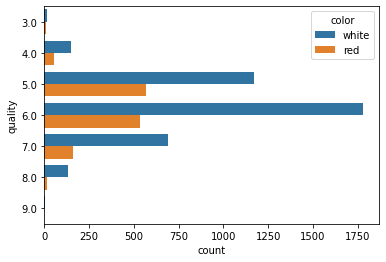

In [463]:
sns.countplot(y='quality', data=df2, hue='color')

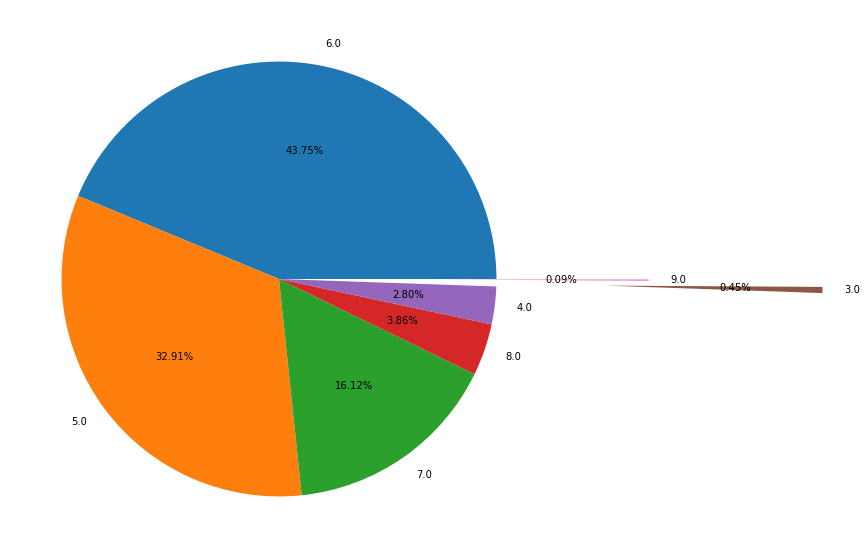

In [464]:
plt.figure(figsize=(15,10))
plt.pie(df2['quality'].value_counts(), labels=df2['quality'].unique(), autopct='%0.2f%%', explode=(0,0,0,0,0,1.5,0.7))
plt.show()

#### One hot encoding of color feature

In [465]:
df3 = pd.get_dummies(df2)

In [466]:
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_red,color_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0,0,1
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0,1,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0,1,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,1,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0,1,0


In [467]:
X = df3.drop("quality", axis=1)
y = df3.quality

In [468]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_red,color_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,1
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,0


In [469]:
y

0       6.0
1       6.0
2       6.0
3       6.0
6       6.0
       ... 
1593    6.0
1594    5.0
1595    6.0
1597    5.0
1598    6.0
Name: quality, Length: 5284, dtype: float64

In [470]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [471]:
X_train.shape

(3698, 13)

In [472]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_red,color_white
4782,6.7,0.300,0.50,12.10,0.045,38.0,127.0,0.99740,3.04,0.53,8.90,0,1
4057,6.6,0.170,0.36,1.90,0.036,38.0,110.0,0.99056,3.05,0.54,11.40,0,1
1300,5.2,0.645,0.00,2.15,0.080,15.0,28.0,0.99444,3.78,0.61,12.50,1,0
2318,7.5,0.260,0.59,11.80,0.046,58.0,164.0,0.99814,3.17,0.46,8.90,0,1
3496,6.0,0.240,0.28,3.95,0.038,61.0,134.0,0.99146,3.30,0.54,11.30,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3831,6.8,0.310,0.19,3.50,0.086,30.0,130.0,0.99300,2.83,0.44,9.60,0,1
4701,6.4,0.485,0.09,7.60,0.044,34.0,144.0,0.99480,3.26,0.38,10.10,0,1
1492,6.2,0.650,0.06,1.60,0.050,6.0,18.0,0.99348,3.57,0.54,11.95,1,0
1532,7.2,0.530,0.13,2.00,0.058,18.0,22.0,0.99573,3.21,0.68,9.90,1,0


In [473]:
X_test.shape

(1586, 13)

In [474]:
y_train.shape

(3698,)

In [475]:
y_test.shape

(1586,)

In [476]:
y_train.unique()

array([6., 4., 7., 5., 8., 3., 9.])

In [477]:
y_train.value_counts()

6.0    1600
5.0    1223
7.0     603
4.0     142
8.0     113
3.0      12
9.0       5
Name: quality, dtype: int64

In [478]:
from collections import Counter
Counter(y_train)

Counter({6.0: 1600, 4.0: 142, 7.0: 603, 5.0: 1223, 8.0: 113, 3.0: 12, 9.0: 5})

#### Performing under sampling

In [480]:
'''
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns, y_train_ns = ns.fit_sample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes before fit {}".format(Counter(y_train_ns)))
'''

'\nfrom imblearn.under_sampling import NearMiss\nns=NearMiss(0.8)\nX_train_ns, y_train_ns = ns.fit_sample(X_train, y_train)\nprint("The number of classes before fit {}".format(Counter(y_train)))\nprint("The number of classes before fit {}".format(Counter(y_train_ns)))\n'

In [481]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [483]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [485]:
y_pred = classifier.predict(X_test)
#print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5586380832282472
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00        12
         4.0       0.71      0.08      0.14        62
         5.0       0.58      0.65      0.62       516
         6.0       0.55      0.68      0.61       712
         7.0       0.52      0.26      0.34       249
         8.0       0.00      0.00      0.00        35

    accuracy                           0.56      1586
   macro avg       0.39      0.28      0.28      1586
weighted avg       0.55      0.56      0.53      1586



C:\Users\nipung\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*The accuracy score is very less. We need to improve this accuracy score*